<a href="https://colab.research.google.com/github/otavio-s-s/data_science/blob/master/An%C3%A1lise%20de%20Risco%20de%20Cr%C3%A9dito%20com%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Risco de Crédito com Machine Learning**

![1.jpg](https://www.imagemhost.com.br/images/2020/08/08/1.jpg)
<a href='https://www.freepik.com/vectors/business'>Business vector created by pch.vector - www.freepik.com</a>

Cada vez mais intuições financeiras têm utilizado técnicas de análise de dados e aprendizado de máquina em suas operações. Alguns exemplos de situações onde tais técnicas podem ser de grande importância para o sucesso da instituição são [detecção de fraudes](https://github.com/otavio-s-s/data_science/blob/master/Credit%20Card%20Fraud%20Detection.ipynb) em cartões de crédito e identificação de risco de crédito. Neste projeto, abordaremos o segundo exemplo.

[Risco de crédito](https://www.bndes.gov.br/wps/portal/site/home/quem-somos/etica-e-compliance/!ut/p/z0/fY3LCsIwEEW_psuSiO9lwRe2ILiQmk2JyVhH24xNRunnG4trl4cz94xQohTK6TfWmpGcbiKf1awqlvl6NznIYnuUI5lN8012WuXjhZyLvVD_D2IB712nMqEMOYaeRXlxFkKFLjDyywyfEnmjFhLpKMVo-0QCo9ERGGqPVtsoY-BKvv1RDYE1pRZSj8FQSL99Tw2EYeUdhUQOqrJQGQ8WmcTzoc4fPQwk2w!!/) é a possibilidade de ocorrência de perdas financeiras devido ao não cumprimento das obrigações por parte do tomador. Em outras palavras, é o risco de inadimplência por parte do tomador do crédito. Com isso em mente, trabalharemos neste projeto com um *dataset* representando, em cada linha, várias das características de uma aplicação para crédito, bem como se tal operação foi classificada ou não como inadimplência. Este *dataset* pode ser encontrado [aqui](http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0).

Portanto, o objetivo deste trabalho é treinar, testar e avaliar um modelo de *machine learning* capaz de prever com alto índice de acerto se uma operação de crédito resultará ou não em inadimplência. Para isso, passaremos pelas seguintes etapas:

* Exploração e limpeza dos dados;
* *Fature engineering*;
* Preparação dos dados;
* Seleção de um modelo de *machine learning*;
* Ajuste, treinamento, teste e avaliação do modelo selecionado.


## **Análise Exploratória e Limpeza dos Dados**
Vamos começar instalando e importando tudo o que for necessário. Em seguida, vamos configurar o notebook e ler os dados em um DataFrame.

In [2]:
# Instalando o BaseMap 
!apt-get install libgeos-3.5.0 -qq
!apt-get install libgeos-dev -qq
!pip install https://github.com/matplotlib/basemap/archive/master.zip -q
!pip install pyproj==1.9.6 -q

E: Unable to locate package libgeos-3.5.0
E: Couldn't find any package by glob 'libgeos-3.5.0'
E: Couldn't find any package by regex 'libgeos-3.5.0'
Selecting previously unselected package libgeos-dev.
(Reading database ... 144487 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     / 170.1MB 1.2MB/s
     |████████████████████████████████| 10.9MB 2.7MB/s 
     |████████████████████████████████| 225kB 39.6MB/s 
     |████████████████████████████████| 2.8MB 2.7MB/s 


In [86]:
# Importando pacotes e bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from sklearn.metrics import confusion_matrix

# Configurando o notebook
sns.set()
%matplotlib inline

# Lendo os dados
credito = pd.read_csv('http://dl.dropboxusercontent.com/s/xn2a4kzf0zer0xu/acquisition_train.csv?dl=0')
credito.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,reason,income,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_first_name,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65014.12,True,sjJbkqJS7cXalHLBFA+EOQ==,Ernn+uVXCMq/6ARrBCcd+A==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,NaN,2,0.0,51.0,leidelaura,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,NaN,39726.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,100018.91,False,xsd3ZdsI3356I3xMxZeiqQ==,rlWIXTBO+VOa34+SpGyhlQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,50.0,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,0.0,1,0.0,17.0,diocezio,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,65023.65,NaN,Ygq6MsM98oC8yceExr69Ig==,PjTIDfJsK0DKL9fO7vuW2g==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,NaN,2,NaN,9.0,veralucia,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,NaN,54591.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,68830.01,False,KET/Pmr6rHp1RJ/P9ymztw==,Cc/kWDLQH3dpHv5HU+pLVA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiE56f...,n+xK9CfX0bCn77lClTWviw==,NaN,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,NaN,3,NaN,38.0,venice,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60011.29,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,NaN,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,0.0,2,1.0,46.0,darzisa,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


Podemos notar que a variável alvo é a `target_default` e é comporta por valores booleanos. Percebe-se ainda a existência de colunas codificadas, provavelmente no intuito de anonimizar o dataset.

Utilizaremos o método `info` para obtermos mais informações sobre os dados.

In [87]:
credito.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

Notamos que o DataFrame é composto por 45 mil linhas e 43 colunas, das quais várias apresentam valores ausentes. Vamos então verificar o percentual de valores ausentes por coluna.

In [88]:
(credito.isnull().sum() / credito.shape[0] * 100).sort_values(ascending=False)

target_fraud                                        96.617778
last_amount_borrowed                                66.568889
last_borrowed_in_months                             66.568889
ok_since                                            58.988889
external_data_provider_credit_checks_last_2_year    50.284444
external_data_provider_credit_checks_last_year      33.608889
credit_limit                                        30.666667
n_issues                                            25.653333
facebook_profile                                     9.906667
marketing_channel                                    7.951111
job_name                                             7.413333
target_default                                       7.242222
external_data_provider_email_seen_before             4.962222
lat_lon                                              3.028889
user_agent                                           1.604444
n_bankruptcies                                       1.548889
n_defaul

Podemos perceber que algumas colunas possuem mais da metade dos valores ausentes, o que dificulta o uso destas no projeto. Inclusive a variável alvo tem valores ausentes.

A seguir, vamos verificar a quantidade de valores únicos por cada coluna.

In [89]:
credito.nunique().sort_values()

external_data_provider_credit_checks_last_2_year        1
channel                                                 1
target_fraud                                            2
target_default                                          2
external_data_provider_credit_checks_last_year          2
facebook_profile                                        2
last_borrowed_in_months                                 2
external_data_provider_credit_checks_last_month         4
n_defaulted_loans                                       5
real_state                                              5
email                                                   6
n_bankruptcies                                          6
score_1                                                 7
marketing_channel                                       9
shipping_state                                         25
score_2                                                35
n_issues                                               44
n_accounts    

Existem das colunas com o mesmo valor em todas as linhas. Ainda, temos variáveis categóricas com quantidades muito altas de valore únicos, às vezes até com um valor único por linha como, por exemplo, as colunas `ids`, `profile_phone_number`, `shipping_zip_code`. Colunas com essas características pouco acrescentam à análise e, portanto, serão descartadas mais a frente.

Vamos agora utilizar o método `describe` para mais informações sobre as variáveis numéricas.

In [90]:
credito.describe()

,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,last_borrowed_in_months,credit_limit,income,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_2_year,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,shipping_zip_code
count,44438.000000,45000.000000,45000.000000,45000.000000,44438.000000,15044.000000,15044.000000,31200.000000,4.443800e+04,18455.000000,44303.000000,44426.000000,44438.000000,33456.000000,45000.000000,22372.0,45000.000000,29876.000000,42767.000000,45000.000000,45000.00,45000.000000
mean,347.983258,100.006797,0.500037,99.925228,0.296717,13782.341991,41.763893,34381.951154,7.160739e+04,35.069737,0.076270,0.004569,10.696701,11.068119,247.537000,0.0,1.501067,0.503381,12.534781,500.399800,inf,33923.514844
std,110.429165,3.178080,0.288326,10.016549,0.101933,8077.571933,10.252705,36586.982218,5.185897e+04,21.663194,0.274052,0.079400,4.592463,4.595501,146.118398,0.0,1.114941,0.499997,126.530487,287.968873,NaN,12692.406382
min,0.000000,86.191572,0.000035,60.663039,0.000000,1005.180000,36.000000,0.000000,4.821180e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-999.000000,0.000000,403.00,12001.000000
25%,270.000000,97.867036,0.252150,93.198353,0.220000,7519.502500,36.000000,10000.000000,4.501078e+04,17.000000,0.000000,0.000000,7.000000,8.000000,120.000000,0.0,1.000000,0.000000,11.000000,252.000000,50948.25,22937.000000
50%,340.000000,100.018900,0.500753,99.974796,0.290000,12023.465000,36.000000,25647.000000,6.126676e+04,32.000000,0.000000,0.000000,10.000000,10.000000,248.000000,0.0,2.000000,1.000000,27.000000,503.000000,101779.00,33896.000000
75%,420.000000,102.141797,0.748816,106.640275,0.360000,19220.270000,36.000000,47086.750000,8.601923e+04,50.000000,0.000000,0.000000,13.000000,14.000000,375.000000,0.0,2.000000,1.000000,43.000000,747.000000,151337.25,44910.000000
max,990.000000,113.978234,0.999973,142.192400,0.900000,35059.600000,60.000000,448269.000000,5.000028e+06,141.000000,5.000000,5.000000,49.000000,49.000000,500.000000,0.0,3.000000,1.000000,59.000000,1000.000000,inf,56000.000000


Duas inconsistências podem ser percebidas: valores `inf` na coluna `reported_income` e valores negativos na coluna `external_data_provider_email_seen_before`.

Vamos primeiro ver a quantidade desses valores em cada coluna.

In [91]:
print('Valore inf em reported_income: {}'.format(len(credito[credito['reported_income'] == np.inf])))
print('Valore negativos em external_data_provider_email_seen_before: {}'.format(len(credito[credito['external_data_provider_email_seen_before'] < 0])))

Valore inf em reported_income: 67
Valore negativos em external_data_provider_email_seen_before: 1293


São 67 valores `inf`. Tais valores são delicados uma vez que podem estar representado quantidades muito altas e, portanto, não faria sentido substituí-los pela mediana, por exemplo. Como são poucas ocorrências, vamos descartá-los.

Já os valore negativos em serão transformados em nulos e posteriormente preenchidos.

### **Limpeza dos Dados**

Começando a limpeza dos dados, além das ações mencionadas acima, vamos agora:

* Descartar variáveis com apenas um ou com quantidades muito altas de valores únicos, como mencionado anteriormente;

* Preencher os valores nulos na coluna `facebook_profile` com `False`, considerando assim que são pessoas sem perfil nessa rede social. Ainda, vamos substituir os valores `True` e `False` nessa coluna por `Sim` e `Não`;

* Substituir valores `@hotmaill.com` e `@gmaill.com` na coluna `email` por `@hotmail.com` e `@gmail.com`, respectivamente.
 
* Descartar linha onde a variável alvo está ausente e transforma os valores da variável alvo para 0 e 1.

In [92]:
# Descartando variáveis
drop = ['external_data_provider_credit_checks_last_2_year', 'ok_since', 'channel',
        'target_fraud','ids', 'last_amount_borrowed', 'profile_phone_number', 
        'reason', 'zip', 'user_agent', 'job_name', 'external_data_provider_first_name',
        'last_borrowed_in_months', 'state', 'shipping_zip_code']

credito_clean = credito.drop(labels=drop, axis=1)

# Lidando com os valores inf
credito_clean = credito_clean[credito_clean['reported_income'] != np.inf]

# Lidando com os valores negativos
credito_clean.loc[credito_clean['external_data_provider_email_seen_before'] < 0,
             'external_data_provider_email_seen_before'] = np.nan

# Transformando a coluna facebook_profile
credito_clean['facebook_profile'].fillna(value=False, inplace=True, axis=0)
credito_clean['facebook_profile'] = credito_clean['facebook_profile'].map({True: 'Sim', False: 'Não'})

# Substituindo valores na coluna email 
credito_clean.loc[credito_clean['email'] == 'hotmaill.com', 'email'] = 'hotmail.com'
credito_clean.loc[credito_clean['email'] == 'gmaill.com', 'email'] = 'gmail.com'

# Limpando a variável alvo
credito_clean.dropna(subset=['target_default'], inplace=True)
credito_clean['target_default'] = credito_clean['target_default'].map({True: 1, False: 0})

credito_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,facebook_profile,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,lat_lon,marketing_channel,reported_income,shipping_state,profile_tags
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,Sim,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,07:52:34,444,outlook.com,2,0.0,51.0,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,57849.0,BR-MT,"{'tags': ['n19', 'n8']}"
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,Não,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,02:34:29,346,gmail.com,1,0.0,17.0,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,4902.0,BR-RS,"{'tags': ['n6', 'n7', 'nim']}"
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,NaN,65023.65,Não,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,NaN,00:60:02,6,gmail.com,2,NaN,9.0,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,163679.0,BR-RR,"{'tags': ['n0', 'n17', 'nim', 'da']}"
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,Não,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11:20:49,406,spgov.com,3,NaN,38.0,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,1086.0,BR-RN,{'tags': ['n4']}
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,60011.29,Sim,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,NaN,13:39:03,240,gmail.com,2,1.0,46.0,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,198618.0,BR-MT,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}"


Os valores ausentes nas colunas numéricas serão preenchidos com a mediana da coluna. Já as colunas categóricas terão os valores ausentes substituídos pelos valores presentes na mesma proporção que estes aparacem na coluna. Para tanto, vamos escrever uma função que:

* Recebe uma coluna;

* Gera um dicionário onde as chaves são as entradas únicas da coluna e os valores são os percentuais que cada chave representa.

* A partir do dicionário, cria uma lista de entradas únicas e uma lista de percentuais;


* Usando estas listas, cria uma série do tamanho da quantidade de valore ausentes na coluna contando os valores presentes na proporção correta

* Usa a série para preencher os valores ausentes

* Verifica se há valores ausentes restantes (por questões de arredondamento dos percentuais) e, se sim, o preenche com o valor mais comum.

* Retorna a coluna preenchida.

In [93]:
def preencher_proporcional(col):
    """ Preenche valores ausentes na mesma proporção dos valores presentes

    Recebe uma coluna e retorna a coluna com os valores ausentes preenchidos
    na proporção dos valores previamente existentes."""
    
    # Gerando o dicionário com valores únicos e sua porcentagens
    percentages = col.value_counts(normalize=True).to_dict()

    # Tranformando as chaves e valores do dicionário em listas      
    percent = [percentages[key] for key in percentages]
    labels = [key for key in percentages]

    # Utilizando as listas para prencher os valores nulos na proporção correta 
    s = pd.Series(np.random.choice(labels, p=percent, size=col.isnull().sum()))
    col = col.fillna(s)
    
    # Verificando se todos os valores ausentes foram preenchidos e
    # preenchendo os que não tiverem sido
    if len(col.isnull()) > 0:
        col.fillna(value=max(percentages, key=percentages.get), inplace=True, axis=0)
        
    return col

Vamos então iterar sobre as colunas o DataFrame e:

* Preencher as variáveis categóricas utilizando a função acima;

* Preencher variáveis numéricas com a mediana.

In [94]:
for col in credito_clean.iloc[:,1:].columns.tolist():
    if credito_clean[col].dtypes == 'O':
        credito_clean[col] = preencher_proporcional(credito_clean[col])
    else:
        credito_clean[col].fillna(value=credito_clean[col].median(), inplace=True, axis=0)

Como podemos ver abaixo, não restam valores ausentes no conjunto de dados.

In [95]:
credito_clean.isnull().sum()

target_default                                     0
score_1                                            0
score_2                                            0
score_3                                            0
score_4                                            0
score_5                                            0
score_6                                            0
risk_rate                                          0
credit_limit                                       0
income                                             0
facebook_profile                                   0
real_state                                         0
n_bankruptcies                                     0
n_defaulted_loans                                  0
n_accounts                                         0
n_issues                                           0
application_time_applied                           0
application_time_in_funnel                         0
email                                         

## **Análises e Feature Engineering**

A coluna `shipping_state` apresenta dados sobre os estados no formato `BR-MG`, `BR-SP`, etc. Vamos então remover a string `BR-`, deixando apenas a sigla do estado.

A coluna `application_time_applied` representa algo como a hora da aplicação. Da forma como está é difícil retirar qualquer *insight*, por isso vamos excluir os valores dos minutos e segundos, possibilitando a análise do impacto de cada hora de aplicação sobre a variável alvo.

Por fim, a coluna `profile_tags` contém *tags* atribuídas a cada solicitante em formato de lista. Vamos transformar esta coluna para que restem apenas as *tags* sem nenhum outro caractere, de forma que, mais a frente, poderemos transforma cada *tag* em uma variável *dummie*.


In [96]:
# Deixando apenas a sigla do estado
credito_clean['shipping_state'] = credito_clean['shipping_state'].str[-2:]

# Excluindo os valores dos minutos e segundos
credito_clean['application_time_applied'] = credito_clean['application_time_applied'].str[:2].astype(int)
credito_clean.loc[credito_clean['application_time_applied'] == 24, 'application_time_applied'] = 0

# Tranformando a coluna profile_tags
credito_clean['profile_tags'] = credito_clean['profile_tags'].str.extract('\[(.*)\]')
credito_clean['profile_tags'] = credito_clean['profile_tags'].str.replace("'","").str.replace(',', '')

credito_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,facebook_profile,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,lat_lon,marketing_channel,reported_income,shipping_state,profile_tags
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,Sim,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,7,444,outlook.com,2,0.0,51.0,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,57849.0,MT,n19 n8
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,Não,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,2,346,gmail.com,1,0.0,17.0,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,4902.0,RS,n6 n7 nim
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,25206.0,65023.65,Não,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,10.0,0,6,gmail.com,2,1.0,9.0,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,163679.0,RR,n0 n17 nim da
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,Não,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11,406,spgov.com,3,1.0,38.0,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,1086.0,RN,n4
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,25206.0,60011.29,Sim,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,10.0,13,240,gmail.com,2,1.0,46.0,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,198618.0,MT,pro+aty n19 da b19


Vamos agora plotar um gráfico de barras para analisar o impacto da coluna `shipping_state` sobre a variável alvo.

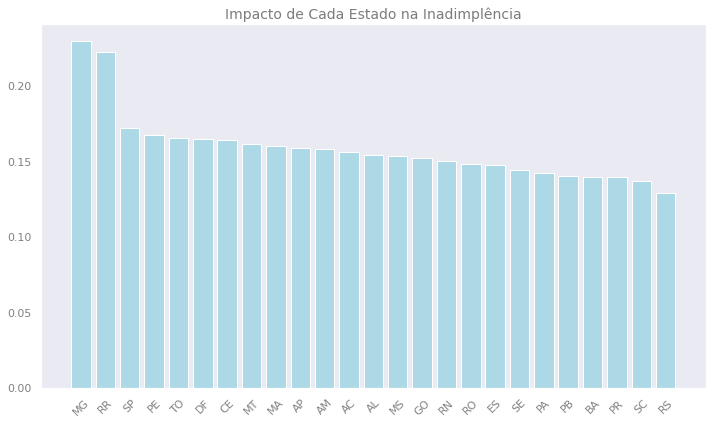

In [97]:
fig, ax = plt.subplots(figsize=(10,6))
grouped = credito_clean.groupby('shipping_state').target_default.mean().sort_values(ascending=False)
ax.bar(grouped.index, grouped, color='lightblue')
ax.grid(False)
ax.set_xlabel('')
ax.set_xticklabels(grouped.index, rotation=45)
ax.tick_params(colors='grey')
ax.set_title('Impacto de Cada Estado na Inadimplência', fontsize=14, alpha=0.6)

plt.tight_layout()

Nota-se que dois estados se destacam, exercendo maior influência sobre a variável alvo.

Vamos agora realizar a mesma análise para coluna `application_time_applied`, que agora representa a apenas a hora da aplicação.

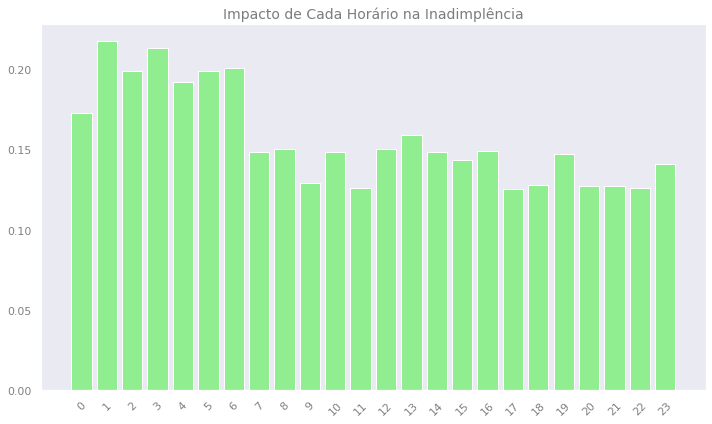

In [98]:
fig, ax = plt.subplots(figsize=(10,6))
grouped = credito_clean.groupby('application_time_applied').target_default.mean().sort_index()
ax.bar(grouped.index, grouped, color='lightgreen')
ax.grid(False)
ax.set_xlabel('')
ax.set_xticklabels(grouped.index, rotation=45)
ax.set_xticks(range(0, 25))
ax.tick_params(colors='grey')
ax.set_title('Impacto de Cada Horário na Inadimplência', fontsize=14, alpha=0.6)

plt.tight_layout()

Percebe-se que aplicações realizadas antes das sete horas da manhã têm maior probabilidade de inadimplência. Para melhor utilizar essa informação, vamos criar a coluna `overnight` com valores 0 e 1, sendo 1 para aplicações feitas de madrugada e 0 para demais horários. 

In [99]:
credito_clean['overnight'] = credito_clean['application_time_applied'].apply(lambda x: 1 if x <= 6 else 0)

Vamos expandir essa análise para outras três variáveis categóricas.

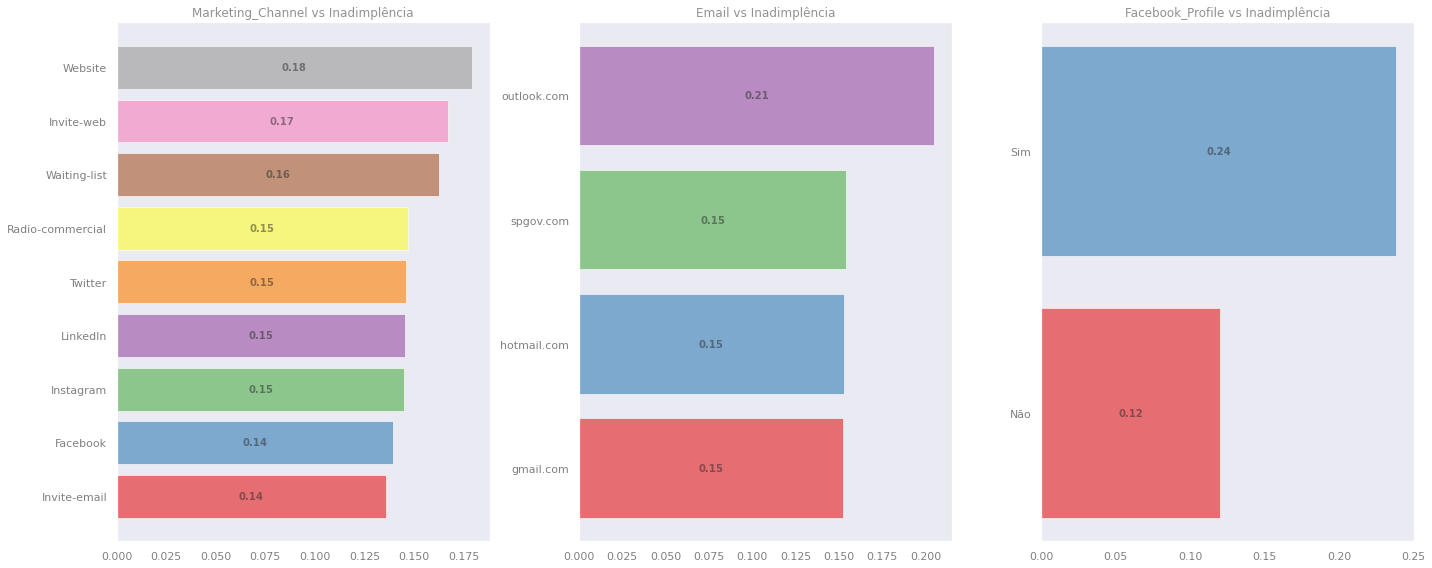

In [100]:
categorical = ['marketing_channel', 'email', 'facebook_profile']

fig = plt.figure(figsize=(20,8))
    
for i in range(len(categorical)):
    to_plot = credito_clean.groupby(categorical[i]).target_default.mean().sort_values()
    ax = fig.add_subplot(1, 3, i+1)
    rects = ax.barh(to_plot.index, to_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.grid(False)
    ax.tick_params(labelleft=True)
    ax.set_title(f'{categorical[i].title()} vs Inadimplência', alpha=0.5)
    ax.tick_params(colors='grey')
    
    for rect in (rects):
        width = rect.get_width()
        ax.text(y=rect.get_y() + rect.get_height() / 2, x=width * 0.5, s=round(width, 2), ha='center', va='center', alpha=0.5, fontweight='bold')

plt.tight_layout()
plt.show()

Notamos que:
* E-mails `@outlook.com` tem maior probabilidade de inadimplência;
* Aplicações com perfil no Facebook têm maior chance de inadimplência;
* Não se pode afirmar muito sobre a coluna `marketing_channel`.


Vamos agora realizar análises semelhantes para algumas colunas numéricas. Para tanto, plotaremos gráficos de dispersão.


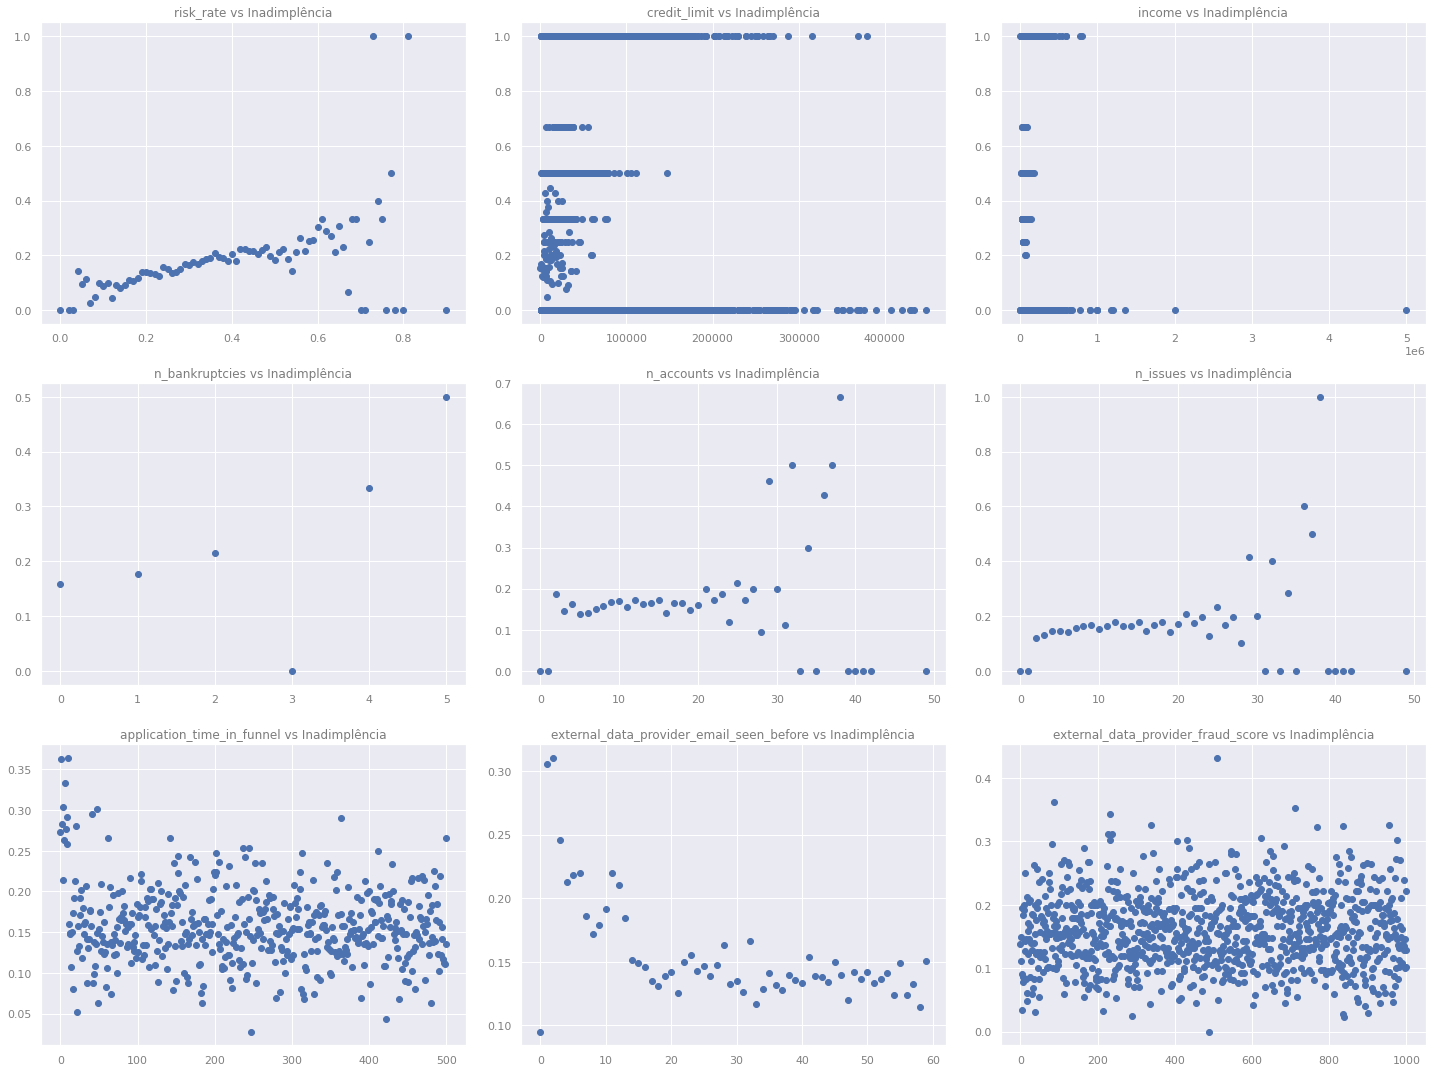

In [101]:
numeric = ['risk_rate', 'credit_limit', 'income', 'n_bankruptcies', 'n_accounts',
 'n_issues', 'application_time_in_funnel', 'external_data_provider_email_seen_before',
 'external_data_provider_fraud_score']

fig = plt.figure(figsize=(20, 15))

for i in range(len(numeric)):
    num_plot = credito_clean.groupby(numeric[i]).target_default.mean()
    ax = fig.add_subplot(3, 3, i+1)
    ax.scatter(num_plot.index, num_plot)
    ax.set_title(f'{numeric[i]} vs Inadimplência', alpha=0.6)
    ax.tick_params(colors='grey')


plt.tight_layout()
plt.show()

Podemos destacar que:
* Valores mais altos na coluna `n_bankruptcies` implicam em maior chance de inadimplência. Isso faz sentido, uma vez que esta coluna representa algo como “número de falências”;
* Valores mais altos na coluna `external_data_provider_email_seen_before` implicam em menor chance de inadimplência;
* Não é possível afirma muito a respeito dos outros gráficos.

Agora, vamos aproveitar a coluna `lat_lon` para verificar a disposição dos casos de inadimplência em um mapa. Para isso, primeiro precisamos usar essa coluna para criar outras duas colunas: latitude e longitude. Ainda, vamos arredondar os valores dessas novas colunas utilizando 4 casa decimais.


In [102]:
# Criando as colunas latitude e longitude
credito_clean['latitude'] = credito_clean['lat_lon'].str.split(',').str[0].str.replace('(', '').astype(float)
credito_clean['longitude'] = credito_clean['lat_lon'].str.split(',').str[1].str.replace(')', '').astype(float)

# Arredondando os valores
credito_clean = credito_clean.round({'latitude':4, 'longitude': 4})

credito_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,facebook_profile,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,lat_lon,marketing_channel,reported_income,shipping_state,profile_tags,overnight,latitude,longitude
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,Sim,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,7,444,outlook.com,2,0.0,51.0,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,57849.0,MT,n19 n8,0,-29.1515,-51.1386
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,Não,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,2,346,gmail.com,1,0.0,17.0,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,4902.0,RS,n6 n7 nim,1,-19.6877,-47.9415
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,25206.0,65023.65,Não,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,10.0,0,6,gmail.com,2,1.0,9.0,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,163679.0,RR,n0 n17 nim da,1,-28.7480,-51.8673
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,Não,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11,406,spgov.com,3,1.0,38.0,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,1086.0,RN,n4,0,-17.5207,-39.7580
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,25206.0,60011.29,Sim,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,10.0,13,240,gmail.com,2,1.0,46.0,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,198618.0,MT,pro+aty n19 da b19,0,-16.5743,-39.9099


Agora, vamos utilizar o `Basemap` para plotar o mapa.

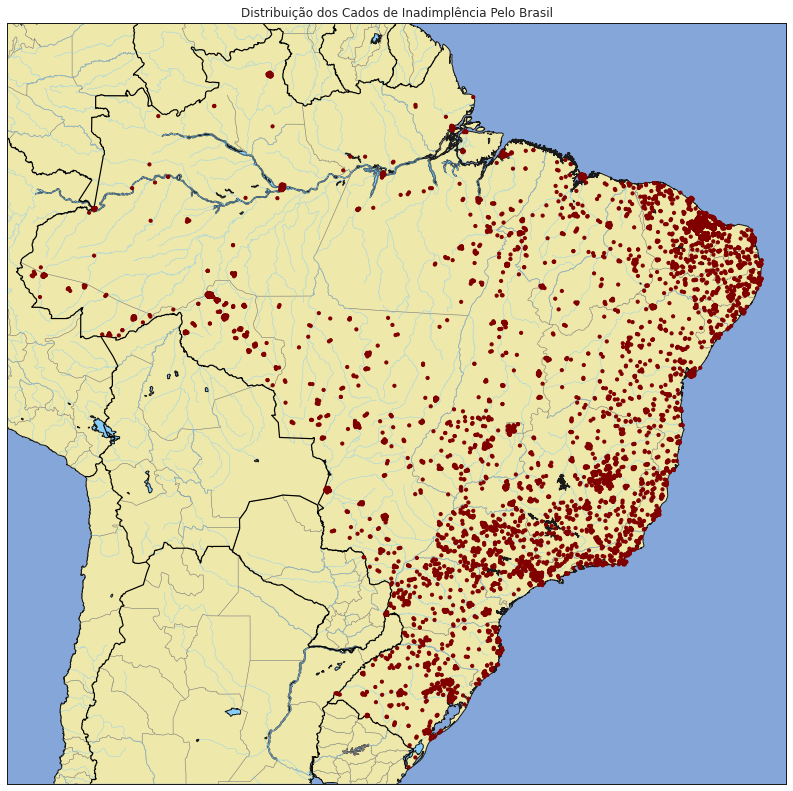

In [103]:
credito_1 = credito_clean[credito_clean['target_default'] == 1]

plt.figure(figsize=(16,14))
m = Basemap(projection='cyl', resolution='h', llcrnrlat=-34.5, urcrnrlat=5.57, 
            llcrnrlon=-74.5, urcrnrlon=-33.47)

m.drawmapboundary(fill_color='#85A6D9')
m.drawcoastlines()
m.fillcontinents(color='palegoldenrod', lake_color='lightskyblue')
m.drawstates(color='grey', linewidth=.6)
m.drawrivers(color='lightskyblue', linewidth=.4)
m.drawcountries(color='black', linewidth=1.2)

m.scatter(credito_1['longitude'], credito_1['latitude'], s=10, zorder=2, latlon=True, c=credito_1['target_default'], cmap=plt.get_cmap('jet_r'))

plt.title('Distribuição dos Cados de Inadimplência Pelo Brasil')
plt.show()

Podemos notar pelo mapa que existe uma maior concentração de casos nas regiões sudeste e nordeste.

Ainda, podemos perceber a baixa quantidade de casos em Roraima, o que pode indicar que a influência do estado na inadimplência, que foi destacada no gráfico dos estados, pode se dar pelo baixo número de ocorrências, tanto da classe positiva como da classe negativa da variável alvo.

Com o gráfico plotado, vamos descartar as colunas relacionas a ele, uma vez que estas não serão utilizadas na construção do modelo.


In [104]:
credito_clean.drop(['latitude', 'longitude', 'lat_lon'], axis=1, inplace=True)

Por último, vamos verificar o balanceamento da variável alvo do *dataset*.

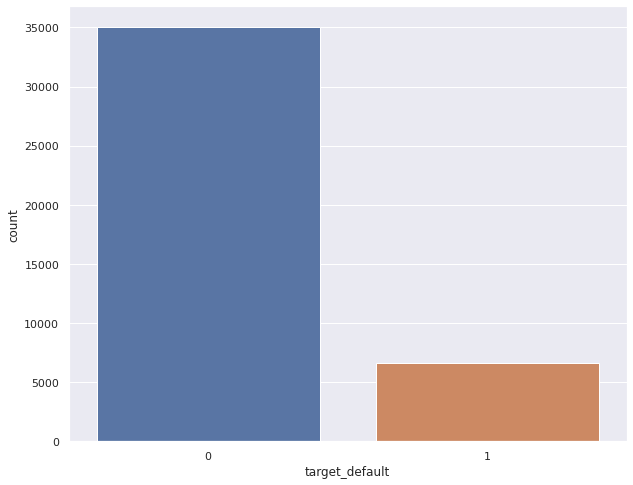

0    35025
1     6650
Name: target_default, dtype: int64

In [105]:
fig, ax = plt.subplots(figsize=(10,8))
sns.countplot(credito_clean['target_default'])
plt.show()

credito_clean['target_default'].value_counts()

Existem em torno de seis vezes mais representações da classe 0 do que da classe 1 no dataset. Levaremos isto em conta na construção do modelo de *machine learning*.

Em última etapa do processo de *feature engineering*, vamos voltar a trabalhar com a coluna `profile_tags`, transformando cada uma das tags em uma variável *dummie*. Para tanto, vamos seguir os seguintes passos:

* Transformar cada conjunto de *tags* em uma lista;
* Selecionar apenas as *tags* únicas em uma lista;
* Iterar sobre a lista de *tags* únicas e usar uma função `lambda` para criar uma coluna para cada *tag*;
* Descartar a coluna `profile_tags`. 


In [106]:
# Transformando cada conjunto de tags em uma lista
credito_clean['profile_tags'] = credito_clean['profile_tags'].str.split()

# Criando uma lista com as tags únicas
tags_unicas = []
for tags in credito_clean['profile_tags']:
    for tag in tags:
        tags_unicas.append(tag)

tags_unicas = list(set(tags_unicas))

# Criando colunas a partir das tags únicas
for tag in tags_unicas:
    credito_clean[tag] = credito_clean['profile_tags'].apply(lambda x: 1 if tag in x else 0)

# Descartando a coluna `profile_tags`
credito_clean.drop('profile_tags', axis=1, inplace=True)

credito_clean.head()

,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,facebook_profile,real_state,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_applied,application_time_in_funnel,email,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,marketing_channel,reported_income,shipping_state,overnight,n4,n12,n3,aty,n6,n19,n0,n9,n2,n17,n16,n15,n11,c55,pro+aty,n1,n10,n14,n13,n18,c1,nim,b19,n8,n5,da,dfa,a15,n7
0,0,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,Sim,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,18.0,18.0,7,444,outlook.com,2,0.0,51.0,645,Invite-email,57849.0,MT,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,Não,N5/CE7lSkAfB04hVFFwllw==,0.0,0.0,14.0,14.0,2,346,gmail.com,1,0.0,17.0,243,Radio-commercial,4902.0,RS,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,1,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,25206.0,65023.65,Não,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,10.0,10.0,0,6,gmail.com,2,1.0,9.0,65,Waiting-list,163679.0,RR,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,Não,n+xK9CfX0bCn77lClTWviw==,1.0,0.0,19.0,19.0,11,406,spgov.com,3,1.0,38.0,815,Waiting-list,1086.0,RN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,25206.0,60011.29,Sim,n+xK9CfX0bCn77lClTWviw==,0.0,0.0,11.0,10.0,13,240,gmail.com,2,1.0,46.0,320,Invite-email,198618.0,MT,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0


## **Preparação dos Dados**

Para preparar os dados para a construção do modelo, vamos usar a classe `LabelEncoder` para transformar variáveis categóricas em forma de texto aleatório como `score_1` e `score_2` (veja acima) em números, para facilitar a visualização.  

Em seguida, essas variáveis serão agrupadas com as demais variáveis categorias e todas elas serão transformadas em *dummies* através da função `get_dummies` do `pandas`. A exceção é a variável `facebook_profile`, que não passará pela segunda etapa, uma vez que, após passar pelo `LabelEncoder` já contará apenas com 0 e 1.

In [107]:
cols_encode = ['score_1', 'score_2', 'facebook_profile', 'real_state']

for col in cols_encode:
    encoder = LabelEncoder().fit(credito_clean[col])
    credito_clean[col] = encoder.transform(credito_clean[col])

col_dummies = cols_encode + ['application_time_applied', 'email', 'marketing_channel', 'shipping_state']
col_dummies.remove('facebook_profile')

credito_clean = pd.get_dummies(credito_clean, columns=col_dummies)

credito_clean.head()

,target_default,score_3,score_4,score_5,score_6,risk_rate,credit_limit,income,facebook_profile,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues,application_time_in_funnel,external_data_provider_credit_checks_last_month,external_data_provider_credit_checks_last_year,external_data_provider_email_seen_before,external_data_provider_fraud_score,reported_income,overnight,n4,n12,n3,aty,n6,n19,n0,n9,n2,n17,n16,n15,n11,c55,pro+aty,n1,n10,n14,n13,n18,...,application_time_applied_22,application_time_applied_23,email_gmail.com,email_hotmail.com,email_outlook.com,email_spgov.com,marketing_channel_Facebook,marketing_channel_Instagram,marketing_channel_Invite-email,marketing_channel_Invite-web,marketing_channel_LinkedIn,marketing_channel_Radio-commercial,marketing_channel_Twitter,marketing_channel_Waiting-list,marketing_channel_Website,shipping_state_AC,shipping_state_AL,shipping_state_AM,shipping_state_AP,shipping_state_BA,shipping_state_CE,shipping_state_DF,shipping_state_ES,shipping_state_GO,shipping_state_MA,shipping_state_MG,shipping_state_MS,shipping_state_MT,shipping_state_PA,shipping_state_PB,shipping_state_PE,shipping_state_PR,shipping_state_RN,shipping_state_RO,shipping_state_RR,shipping_state_RS,shipping_state_SC,shipping_state_SE,shipping_state_SP,shipping_state_TO
0,0,350.0,101.800832,0.259555,108.427273,0.40,0.0,65014.12,1,0.0,0.0,18.0,18.0,444,2,0.0,51.0,645,57849.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,370.0,97.062615,0.942655,92.002546,0.24,39726.0,100018.91,0,0.0,0.0,14.0,14.0,346,1,0.0,17.0,243,4902.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,360.0,100.027073,0.351918,112.892453,0.29,25206.0,65023.65,0,0.0,0.0,10.0,10.0,6,2,1.0,9.0,65,163679.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,510.0,101.599485,0.987673,94.902491,0.32,54591.0,68830.01,0,1.0,0.0,19.0,19.0,406,3,1.0,38.0,815,1086.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,500.0,98.474289,0.532539,118.126207,0.18,25206.0,60011.29,1,0.0,0.0,11.0,10.0,240,2,1.0,46.0,320,198618.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


O próximo passos será dividir o `dataset` em treino e teste e padronizar os dados utilizando a classe `StandardScaler`. Após realizarmos este processo com o *dataset* original, vamos usar a função `resample` para criar um *dataset* balanceado e repetir, neste novo *dataset*, o mesmo processo de divisão e padronização dos dados. Em seguida, vamos verificar o balanceamento.

1    35025
0    35025
Name: target_default, dtype: int64 



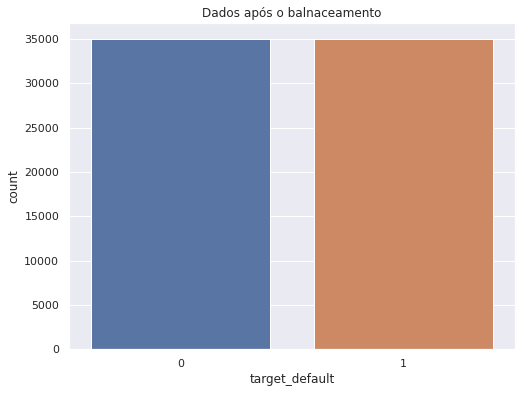

In [108]:
# Dividindo e padronizando o dataset original
X = credito_clean.drop('target_default', axis=1)
y = credito_clean['target_default']

X_train, X_test, y_train, y_test = train_test_split(X, y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_unb = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Criando o dataset balanceado
maioria = credito_clean[credito_clean['target_default'] == 0]
minoria = credito_clean[credito_clean['target_default'] == 1]

minoria_balanceada = resample(minoria, replace=True, n_samples=35025)

credito_balanceado = pd.concat([maioria, minoria_balanceada])

# Dividindo e padronizando o dataset balanceado
X_balanceado = credito_balanceado.drop('target_default', axis=1)
y_balanceado = credito_balanceado['target_default']

X_train_balanceado, X_test_balanceado, y_train_balanceado, y_test_balanceado = train_test_split(X_balanceado, y_balanceado)

scaler_balanceado = StandardScaler()
scaler_balanceado.fit(X_train_balanceado)
X_train_balanceado = scaler_balanceado.transform(X_train_balanceado)
X_test_balanceado = scaler_balanceado.transform(X_test_balanceado)

# Verificando o balanceamento
print(credito_balanceado['target_default'].value_counts(), '\n')

fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(credito_balanceado['target_default'])
ax.set_title('Dados após o balnaceamento')
plt.show()

## **Machine Learning**

Vamos usar quatro algoritmos diferentes para treinar modelos:
* [Regressão Logística](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica);
* [Árvores de Decisão](https://medium.com/machine-learning-beyond-deep-learning/%C3%A1rvores-de-decis%C3%A3o-3f52f6420b69);
* [Random Forest](https://en.wikipedia.org/wiki/Random_forest);
* [XGBoost](https://pt.wikipedia.org/wiki/Xgboost).

Usando a técnica de [validação cruzada](https://pt.wikipedia.org/wiki/Valida%C3%A7%C3%A3o_cruzada#:~:text=A%20valida%C3%A7%C3%A3o%20cruzada%20%C3%A9%20uma,da%20modelagem%20%C3%A9%20a%20predi%C3%A7%C3%A3o.), vamos ver o desempenho desses quatro algoritmos tanto com os dados balanceados, como com os dados desbalanceados e, portando, teremos oito modelos.
Usaremos as seguintes [métricas](https://www.mariofilho.com/as-metricas-mais-populares-para-avaliar-modelos-de-machine-learning/) para avaliar os modelos:

* Acurácia;
* Precisão;
* Recall;
* Área sob a curva ROC.

Em seguida, vamos gerar um DataFrame com os resultados de cada um dos modelos para facilitar a visualização e a escolha do melhor modelo.

In [26]:
# Criando os modelos utilizando validação cruzada
logreg_balanceado  = cross_validate(LogisticRegression(solver='liblinear'), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
logreg = cross_validate(LogisticRegression(solver='liblinear'), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

trees_balanceado  = cross_validate(DecisionTreeClassifier(), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
trees = cross_validate(DecisionTreeClassifier(), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

forest_balanceado  = cross_validate(RandomForestClassifier(), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
forest = cross_validate(RandomForestClassifier(), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

xgb_balanceado  = cross_validate(XGBClassifier(), X_train_balanceado, y_train_balanceado, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])
xgb = cross_validate(XGBClassifier(), X_train, y_train, cv=5, scoring=['accuracy', 'precision', 'recall', 'roc_auc'])

# Gerando um DataFrame com os resultados de cada modelo
summary = pd.DataFrame({
            'labels': ['accuracy', 'precision', 'recall', 'roc_auc'],
            'logreg_balanceado': [logreg_balanceado['test_accuracy'].mean(), logreg_balanceado['test_precision'].mean(), logreg_balanceado['test_recall'].mean(), logreg_balanceado['test_roc_auc'].mean()],
            'logreg': [logreg['test_accuracy'].mean(), logreg['test_precision'].mean(), logreg['test_recall'].mean(), logreg['test_roc_auc'].mean()],
            'trees_balanceado': [trees_balanceado['test_accuracy'].mean(), trees_balanceado['test_precision'].mean(), trees_balanceado['test_recall'].mean(), trees_balanceado['test_roc_auc'].mean()],
            'trees': [trees['test_accuracy'].mean(), trees['test_precision'].mean(), trees['test_recall'].mean(), trees['test_roc_auc'].mean()],
            'forest_balanceado': [forest_balanceado['test_accuracy'].mean(), forest_balanceado['test_precision'].mean(), forest_balanceado['test_recall'].mean(), forest_balanceado['test_roc_auc'].mean()],
            'forest': [forest['test_accuracy'].mean(), forest['test_precision'].mean(), forest['test_recall'].mean(), forest['test_roc_auc'].mean()],
            'xgb_balanceado': [xgb_balanceado['test_accuracy'].mean(), xgb_balanceado['test_precision'].mean(), xgb_balanceado['test_recall'].mean(), xgb_balanceado['test_roc_auc'].mean()],
            'xgb': [xgb['test_accuracy'].mean(), xgb['test_precision'].mean(), xgb['test_recall'].mean(), xgb['test_roc_auc'].mean()]           
}).set_index('labels')
summary.index.name=None
summary = summary.transpose()    
summary.style.applymap(lambda x: 'background-color: lightgreen' if x >= 0.75 else '')

,accuracy,precision,recall,roc_auc
logreg_balanceado,0.662733,0.662658,0.658570,0.723513
logreg,0.838687,0.000000,0.000000,0.496262
trees_balanceado,0.877020,0.816734,0.971166,0.877322
trees,0.744689,0.234108,0.256442,0.547520
forest_balanceado,0.958030,0.951162,0.965360,0.987680
forest,0.839007,0.557986,0.010511,0.699608
xgb_balanceado,0.672326,0.672940,0.666514,0.739178
xgb,0.841246,0.615513,0.044031,0.724776


De uma forma geral, os dados balanceados apresentaram melhores resultados considerando as quatro métricas utilizadas. Dentre os algoritmos, *Random Forests* apresentou os melhores resultados e, portanto, a combinação desse modelo com os dados balanceados é a escolhida para o projeto..

### ***Tunning* de Hiperparâmetros**

Para realizar um ajuste fino no modelo, nas próximas células de código vamos utilizar a técnica de [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) para escolher o melhor valor para os seguintes hiperparâmetros:

* *criterion*;
* *n_estimators*;
* *max_depth*;
* *min_samples_split*;
* min_samples_leaf.


In [31]:
kfold = StratifiedKFold(n_splits=5, shuffle=True)

forest = RandomForestClassifier()

param_grid = {'criterion': ['gini', 'entropy']}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_train_balanceado, y_train_balanceado)

print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')

Melhor resultado: 0.9861359409206981 para {'criterion': 'gini'}


In [32]:
forest = RandomForestClassifier(criterion='gini')

param_grid = {'n_estimators': range(50, 500, 50)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_train_balanceado, y_train_balanceado)

print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')

Melhor resultado: 0.9874987742559391 para {'n_estimators': 400}


In [33]:
forest = RandomForestClassifier(criterion='gini', n_estimators=400)

param_grid = {'max_depth': range(1, 10)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_train_balanceado, y_train_balanceado)

print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')

Melhor resultado: 0.7652671250910943 para {'max_depth': 9}


In [34]:
forest = RandomForestClassifier(criterion='gini', n_estimators=400)

param_grid = {'min_samples_split': range(2, 10, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_train_balanceado, y_train_balanceado)

print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')

Melhor resultado: 0.9876456384401593 para {'min_samples_split': 2}


In [35]:
forest = RandomForestClassifier(criterion='gini', n_estimators=400, min_samples_split=2)

param_grid = {'min_samples_leaf': range(1, 6, 2)}

search = GridSearchCV(forest, param_grid, scoring='roc_auc', cv=kfold)
result = search.fit(X_train_balanceado, y_train_balanceado)

print(f'Melhor resultado: {result.best_score_} para {result.best_params_}')

Melhor resultado: 0.9875772351859455 para {'min_samples_leaf': 1}


Com os hiperparâmetros ajustados, vamos agora avaliar o modelo com os dados de teste.

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      8672
           1       0.98      0.99      0.98      8841

    accuracy                           0.98     17513
   macro avg       0.98      0.98      0.98     17513
weighted avg       0.98      0.98      0.98     17513

ROC_AUC Score: 0.9803027167954068 



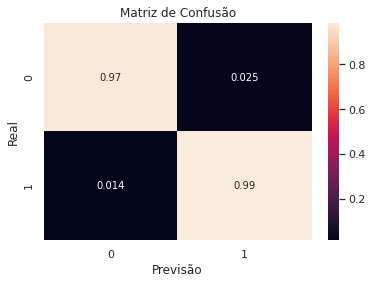

In [36]:
modelo = RandomForestClassifier(criterion='gini', n_estimators=400, min_samples_split=2, min_samples_leaf=1)
modelo.fit(X_train_balanceado, y_train_balanceado)

y_pred = modelo.predict(X_test_balanceado)

print(classification_report(y_test_balanceado, y_pred))
print(f'ROC_AUC Score: {roc_auc_score(y_test_balanceado, y_pred)}', '\n')

fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test_balanceado, y_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Matriz de Confusão')
ax.set_ylabel('Real')
ax.set_xlabel('Previsão')
plt.show()

## **Conclusão**

Neste projeto, trabalhamos com um problema de identificação de risco de crédito com objetivo de construir um modelo de *machine learning* capaz de identificar possíveis inadimplentes. Para isso, passo pelas seguintes etapas:

* Exploração e limpeza dos dados;
* Análise dos dados e *feature engineering*;
* Preparação dos dados para *machine learning*;
* Seleção do algoritmo;
* Ajuste, treinamento e avaliação de um modelo de *machine learning*.

Como resultado, além de alguns *insights* relevantes sobre o impacto de algumas características na variável alvo, foi construído um modelo preditivo que demonstrou acurácia de 98%, sendo considerado um resultado satisfatório e, portando, cumprindo o objetivo inicialmente proposto.

Caso tenha alguma dúvida, sugestão ou feedback, sinta-se à vontade para entrar em contado via [GitHub](https://github.com/otavio-s-s/data_science) ou [Linkedin](https://www.linkedin.com/in/otavioss28/).
